In [8]:
!pip install ffmpeg moviepy

In [18]:
!pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=90cd63cc569baa27bab40c6eea26654f64fd5f2b8513ad94f23fb014accd774c
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=fcdaad1e24fc40ecfdd2e98da77d3e79f958f507ad73273bf279c1694e93f106
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=f00fbc5f3d71c6127bdfe4b3179c958db8b4f1fa9a9833d62099fa6049a7620d
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built librosa audioread resampy


In [1]:
import moviepy.editor as mp
import os
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Audio
import scipy

In [2]:
my_clip = mp.VideoFileClip(r"C:/Users/Gauri/Desktop/New folder/train_splits/dia8_utt0.mp4")

In [3]:
my_clip

In [4]:
my_clip.audio.write_audiofile(r"C:/Users/Gauri/Desktop/New folder/train_splits/Convert_dia0_utt0.wav")

chunk:   0%|                                                                          | 0/91 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/Convert_dia0_utt0.wav


MoviePy - Done.


In [31]:
sr = 16000
y, sr = librosa.load(r"C:/Users/Gauri/Desktop/New folder/train_splits/Convert_dia0_utt0.wav")

In [11]:
y

array([-5.32535887e-05, -3.73952487e-03, -6.57481549e-04, ...,
       -1.14160626e-04,  3.10170981e-05,  1.09859466e-04], dtype=float32)

In [7]:
from IPython.display import Audio

In [8]:
Audio(r"C:/Users/Gauri/Desktop/New folder/train_splits/Convert_dia0_utt0.wav")

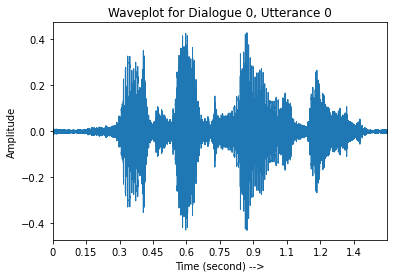

In [3]:
from librosa import display
plt.figure()
librosa.display.waveplot(y = y, sr = sr)
plt.title('Waveplot for Dialogue 0, Utterance 0')
plt.xlabel('Time (second) -->')
plt.ylabel('Amplitude')
plt.show()

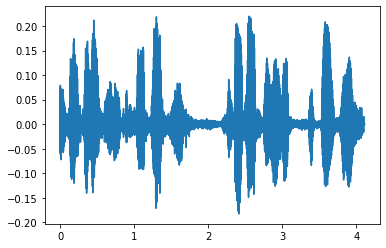

In [28]:
time = np.arange(0, len(y))/sr
plt.plot(time, y)

In [4]:
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    print(T, n)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.title('Fast Fourier Plot for Dialogue 0, Utterance 0')
    plt.xlabel('Frequency -->')
    plt.ylabel('Magnitude')
    return plt.show()

4.5351473922902495e-05 33075


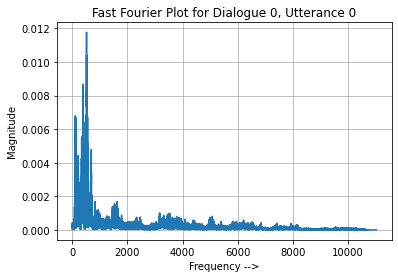

In [5]:
fft_plot(y, sr)

In [18]:
np.linspace?

In [23]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, window_ms = 20.0, max_freq = None, eps = 1e-14):
    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)
    
    #Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size: (stride_size + window_size)])
    
    #Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis = 0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    #Prepare fft frequency list
    freqs = float(sample_rate)/window_size * np.arange(fft.shape[0])
    
    #Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

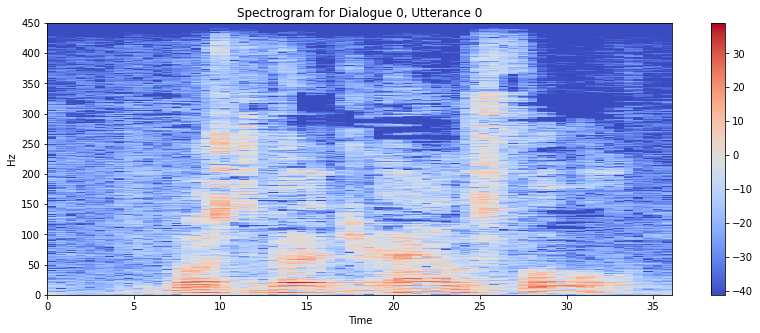

In [35]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=900, x_axis='time', y_axis='hz', hop_length = 500)
plt.title('Spectrogram for Dialogue 0, Utterance 0')
plt.colorbar()

In [7]:
data = pd.read_csv(r'C:\Users\Gauri\Desktop\DS3-Speech-Rec\MELD\data\MELD\train_sent_emo.csv')
data

Sr No.                                          Utterance  \
0          1  also I was the point person on my company’s tr...   
1          2                   You must’ve had your hands full.   
2          3                            That I did. That I did.   
3          4      So let’s talk a little bit about your duties.   
4          5                             My duties?  All right.   
...      ...                                                ...   
9984   10474                                         You or me?   
9985   10475  I got it. Uh, Joey, women don't have Adam's ap...   
9986   10476               You guys are messing with me, right?   
9987   10477                                              Yeah.   
9988   10478  That was a good one. For a second there, I was...   

              Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  
0          21  00:16:16,059  00:16:21,731  
1          21  00:16:21,940  00:16:23,442  
2          21  00:16:23,442  00:16:26,389  
3          21  00:16:26,820  00:16:29,572  
4          21  00:16:34,452  00:16:40,917  
...       ...           ...           ...  
9984        3  00:00:48,173  00:00:50,799  
9985        3  00:00:51,009  00:00:53,594  
9986        3  00:01:00,518  00:01:03,520  
9987        3  00:01:05,398  00:01:07,274  
9988        3  00:01:08,401  00:01:12,071  

[9989 rows x 11 columns]

In [38]:
data['Emotion'].value_counts()

neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64

In [35]:
joy_data = data[data['Emotion'] == 'joy']
joy_data.shape

(1743, 11)

Dialogue:  2
Utterance:  2


chunk:   0%|                                                                          | 0/41 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia2_utt2.wav


MoviePy - Done.


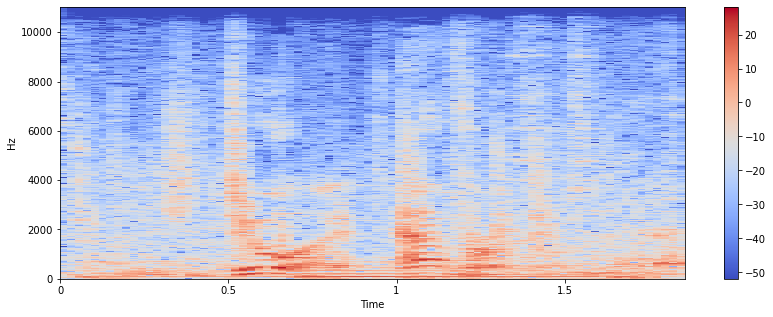

Dialogue:  2
Utterance:  10


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia2_utt10.wav
MoviePy - Done.


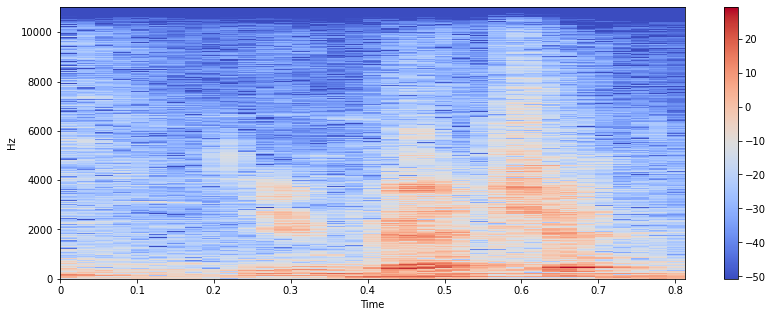

Dialogue:  2
Utterance:  12


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia2_utt12.wav
MoviePy - Done.


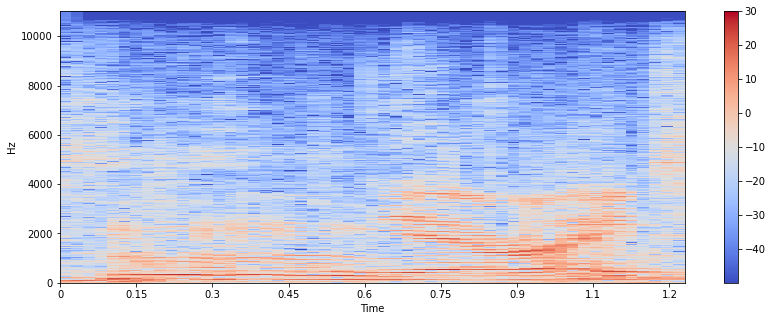

Dialogue:  4
Utterance:  1


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia4_utt1.wav
MoviePy - Done.


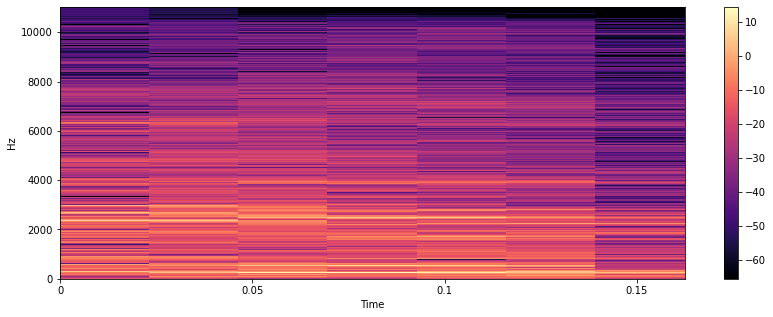

Dialogue:  4
Utterance:  8


chunk:   0%|                                                                         | 0/178 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia4_utt8.wav


MoviePy - Done.


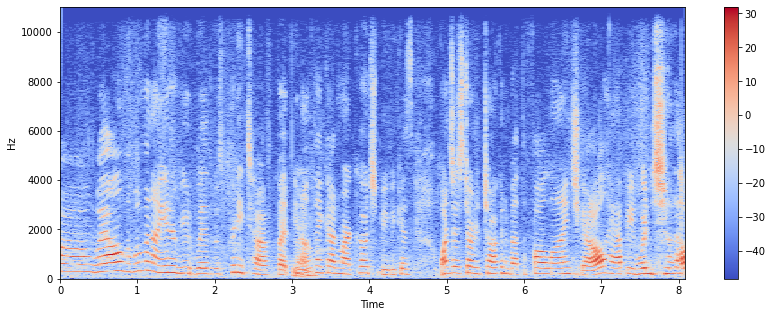

Dialogue:  4
Utterance:  9


chunk:  10%|██████▍                                                           | 3/31 [00:00<00:01, 18.41it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia4_utt9.wav


MoviePy - Done.


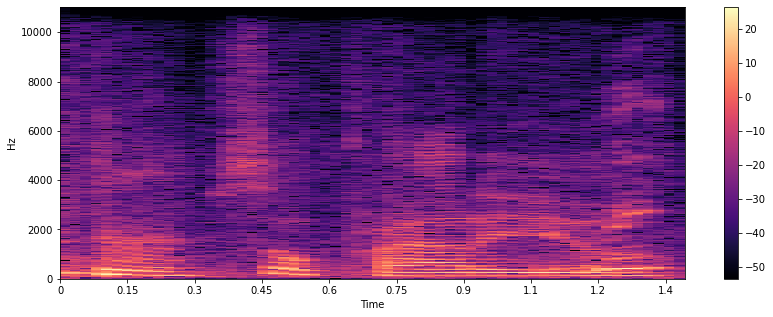

Dialogue:  4
Utterance:  10


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia4_utt10.wav
MoviePy - Done.


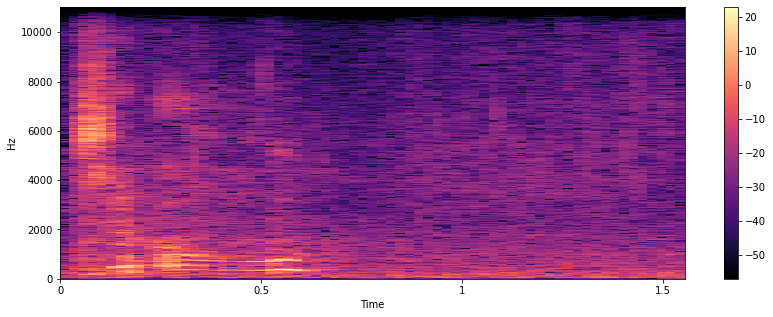

Dialogue:  6
Utterance:  0


chunk:   4%|██▊                                                               | 3/72 [00:00<00:03, 19.14it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia6_utt0.wav


MoviePy - Done.


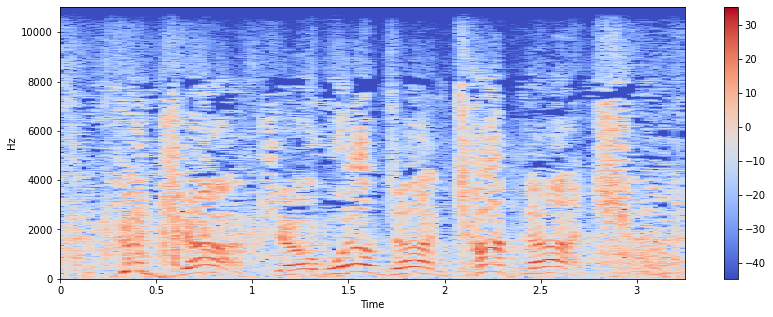

Dialogue:  6
Utterance:  2


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia6_utt2.wav
MoviePy - Done.


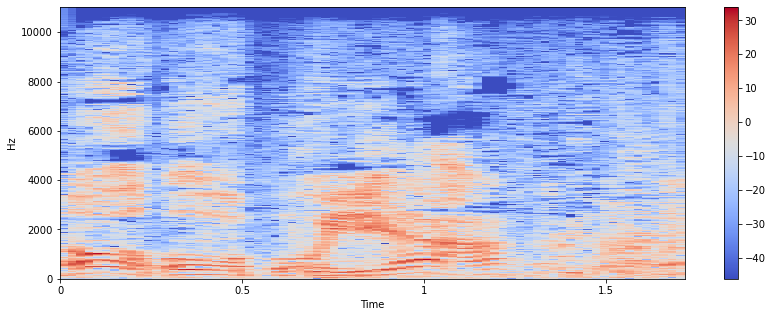

Dialogue:  6
Utterance:  6


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia6_utt6.wav
MoviePy - Done.


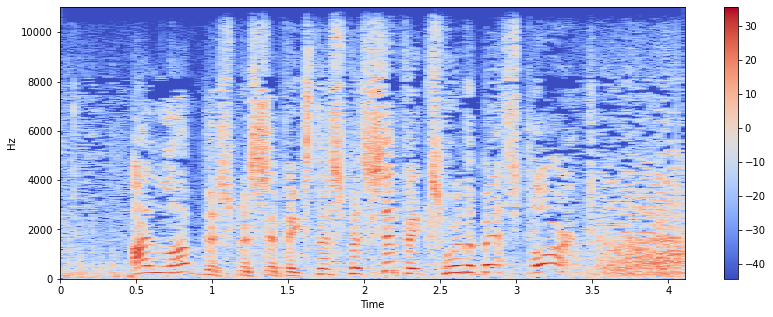

Dialogue:  8
Utterance:  4


chunk:   5%|███                                                               | 3/64 [00:00<00:02, 20.69it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia8_utt4.wav


MoviePy - Done.


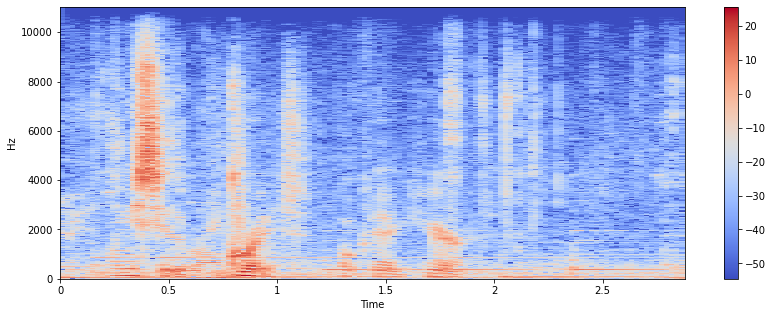

Dialogue:  8
Utterance:  6


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia8_utt6.wav
MoviePy - Done.


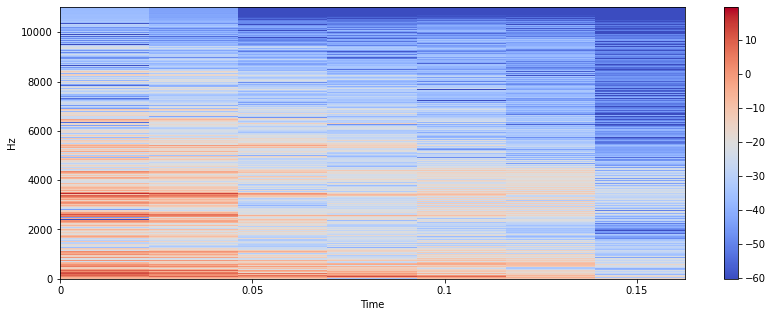

Dialogue:  9
Utterance:  3


chunk:   3%|██                                                                | 3/94 [00:00<00:04, 18.34it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia9_utt3.wav


MoviePy - Done.


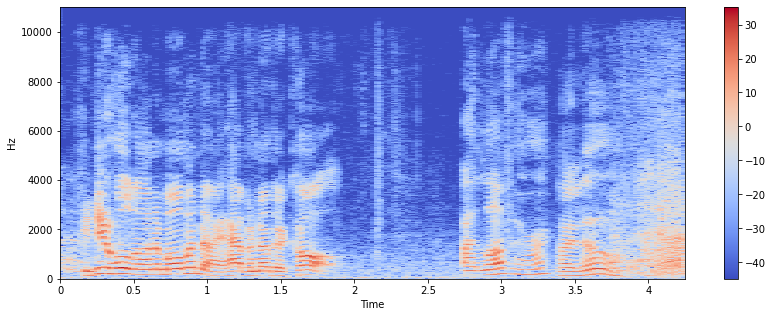

Dialogue:  9
Utterance:  9


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia9_utt9.wav


MoviePy - Done.


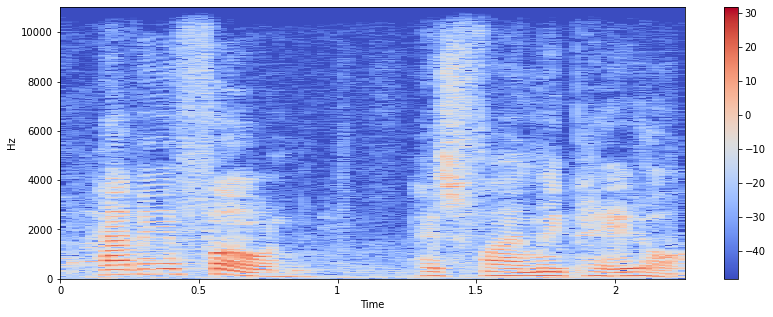

Dialogue:  11
Utterance:  3


chunk:   0%|                                                                          | 0/64 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia11_utt3.wav


MoviePy - Done.


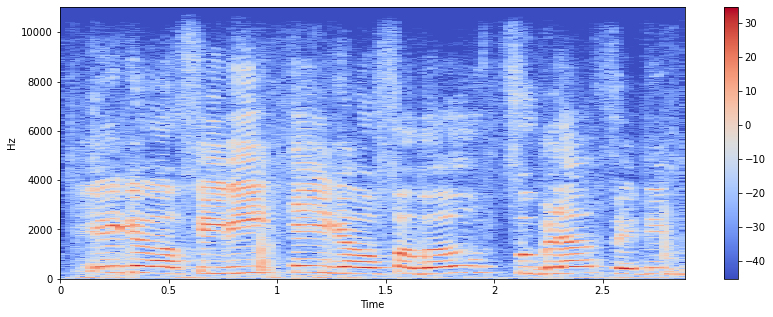

Dialogue:  11
Utterance:  6


chunk:   0%|                                                                          | 0/44 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia11_utt6.wav


MoviePy - Done.


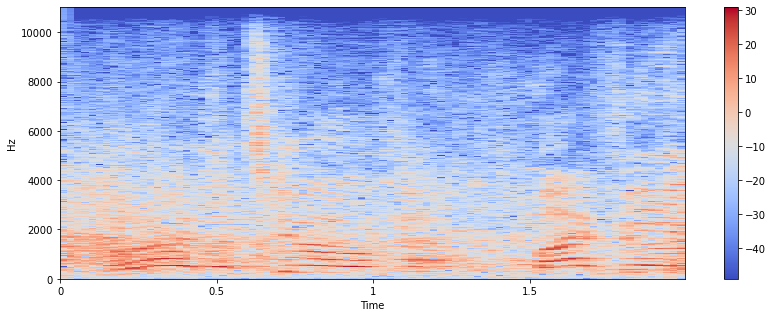

Dialogue:  11
Utterance:  7


chunk:   8%|█████                                                             | 3/39 [00:00<00:01, 22.40it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia11_utt7.wav


MoviePy - Done.


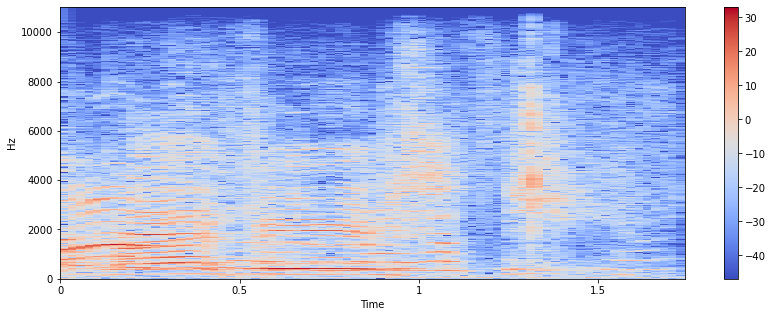

Dialogue:  11
Utterance:  8


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia11_utt8.wav
MoviePy - Done.


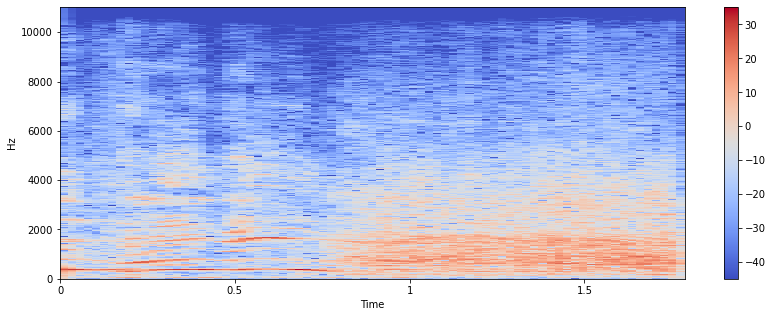

Dialogue:  11
Utterance:  9


chunk:   0%|                                                                         | 0/149 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia11_utt9.wav


MoviePy - Done.


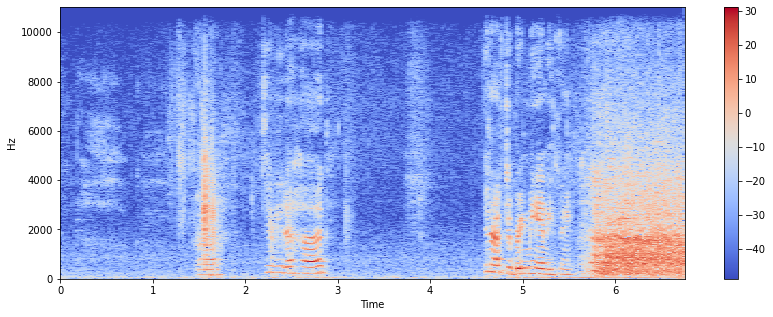

Dialogue:  12
Utterance:  1


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia12_utt1.wav
MoviePy - Done.

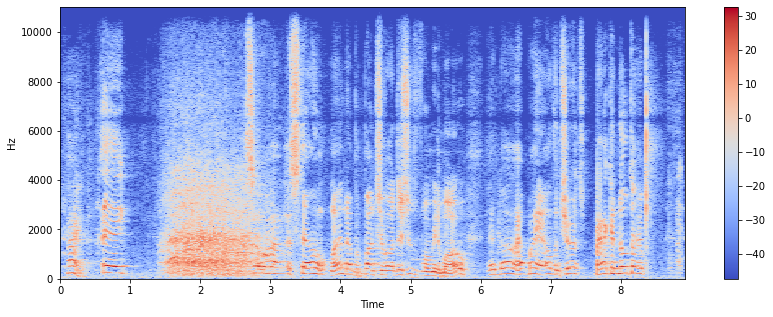

In [53]:
counter = 0
samples = np.array([])
rates = np.array([])
for dia, utt in zip(joy_data['Dialogue_ID'], joy_data['Utterance_ID']):
    if counter >= 20:
        break
    print('Dialogue: ', dia)
    print('Utterance: ', utt)
    my_clip = mp.VideoFileClip(f"C:/Users/Gauri/Desktop/New folder/train_splits/dia{dia}_utt{utt}.mp4".format(dia, utt))
    my_clip.audio.write_audiofile(f"C:/Users/Gauri/Desktop/New folder/train_splits/dia{dia}_utt{utt}.wav".format(dia, utt))
    y, sr = librosa.load(f"C:/Users/Gauri/Desktop/New folder/train_splits/dia{dia}_utt{utt}.wav".format(dia, utt))
    samples = np.append(samples, [y])
    rates = np.append(rates, [sr])
    Y = librosa.stft(y)
    Ydb = librosa.amplitude_to_db(abs(Y))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()
    counter += 1

In [45]:
indices = 'dia_' + joy_data['Dialogue_ID'][:20].astype(str) + 'utt_' + joy_data['Utterance_ID'][:20].astype(str)

In [52]:
samples

index         0
0              0 -0.003610
1              1  0.003443
2              2  0.002523
3              3 -0.006967
4              4 -0.000612
...          ...       ...
1267876  1267876 -0.001841
1267877  1267877 -0.001950
1267878  1267878 -0.000969
1267879  1267879  0.000371
1267880  1267880  0.000550

[1267881 rows x 2 columns]

In [47]:
df = pd.DataFrame([indices, samples, rates], columns = ['ID', 'Y', 'SR'])
df

ID   Y  SR
0 NaN NaN NaN
1 NaN NaN NaN
2 NaN NaN NaN

In [39]:
fear_data = data[data['Emotion'] == 'fear']
fear_data.shape

(268, 11)

Dialogue:  0
Utterance:  10


chunk:   0%|                                                                          | 0/45 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia0_utt10.wav


MoviePy - Done.


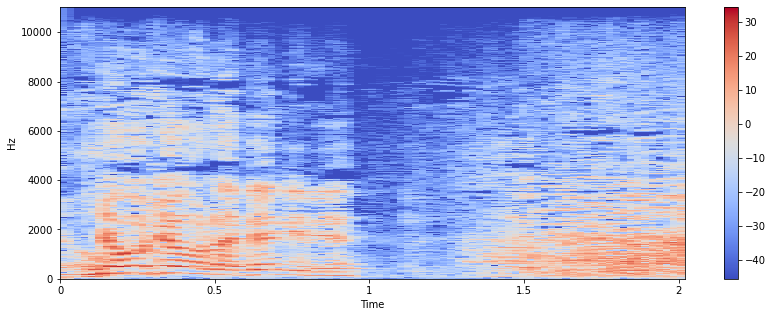

Dialogue:  1
Utterance:  3


MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia1_utt3.wav
MoviePy - Done.


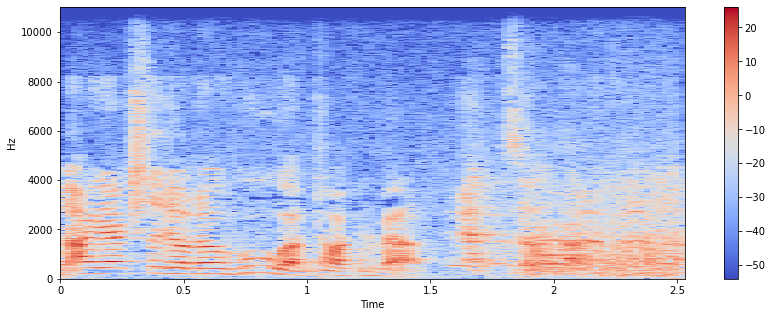

Dialogue:  12
Utterance:  6


chunk:   1%|▊                                                                | 3/230 [00:00<00:10, 21.38it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia12_utt6.wav


MoviePy - Done.


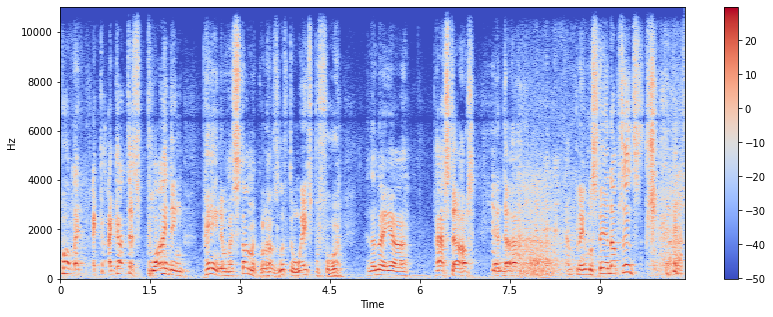

Dialogue:  12
Utterance:  9


chunk:   5%|███                                                              | 7/146 [00:00<00:01, 69.94it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia12_utt9.wav


MoviePy - Done.


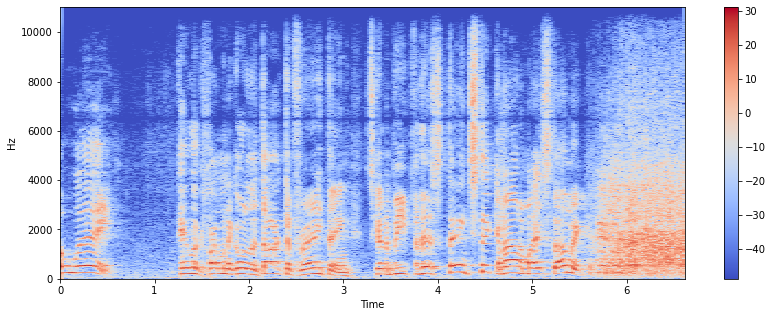

Dialogue:  17
Utterance:  4


chunk:   4%|██▉                                                               | 3/68 [00:00<00:02, 26.13it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia17_utt4.wav


MoviePy - Done.


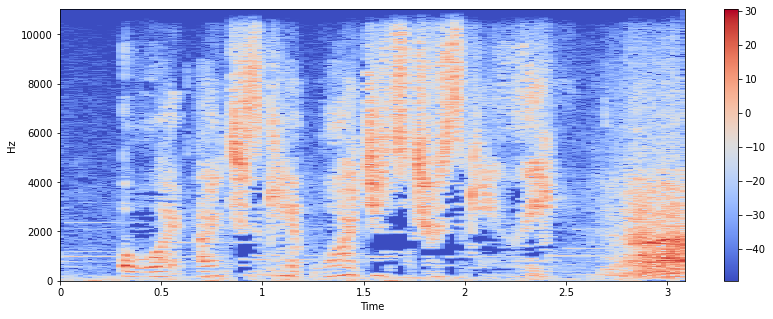

Dialogue:  17
Utterance:  6


chunk:   0%|                                                                          | 0/65 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia17_utt6.wav


MoviePy - Done.


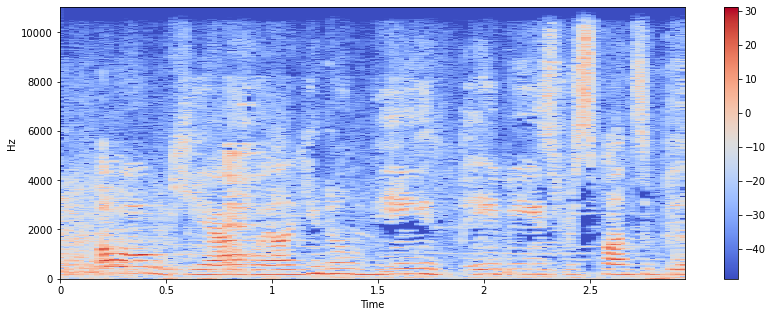

Dialogue:  18
Utterance:  6


chunk:  12%|███████▉                                                          | 3/25 [00:00<00:01, 15.31it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia18_utt6.wav


MoviePy - Done.


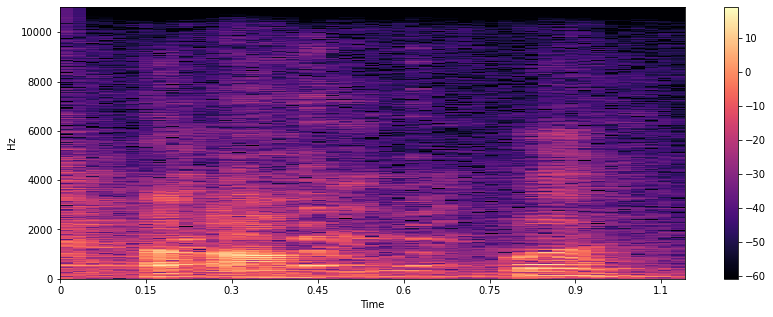

Dialogue:  18
Utterance:  10


chunk:   4%|██▍                                                               | 3/80 [00:00<00:02, 26.43it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia18_utt10.wav


MoviePy - Done.


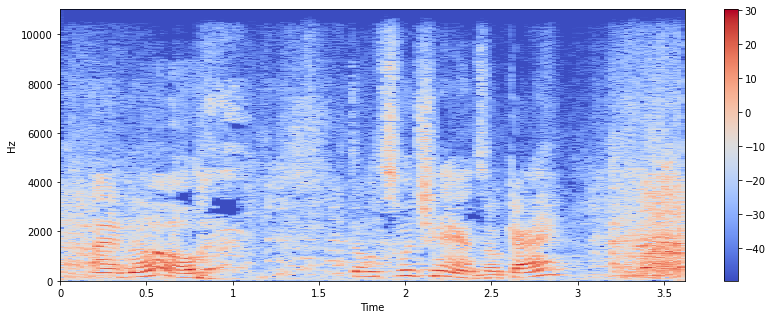

Dialogue:  24
Utterance:  8


chunk:   3%|██                                                                | 3/98 [00:00<00:05, 18.04it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia24_utt8.wav


MoviePy - Done.


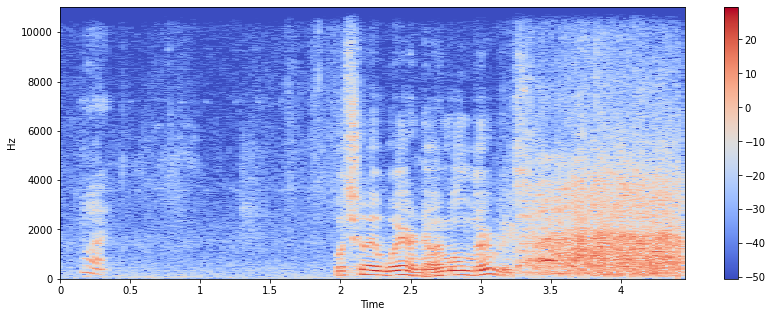

Dialogue:  28
Utterance:  4


chunk:   3%|█▊                                                               | 3/106 [00:00<00:05, 17.88it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia28_utt4.wav


MoviePy - Done.


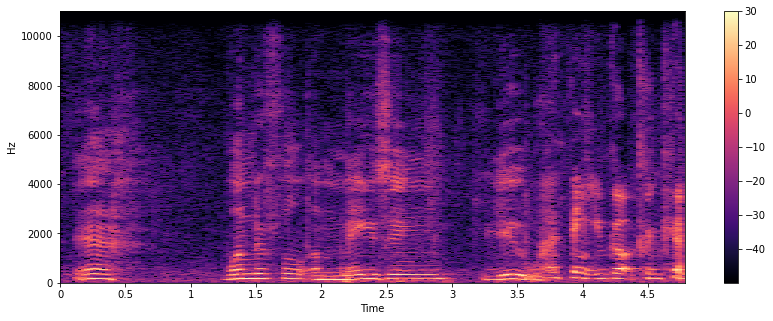

Dialogue:  28
Utterance:  6


chunk:   2%|█▏                                                               | 3/163 [00:00<00:06, 24.32it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia28_utt6.wav


MoviePy - Done.


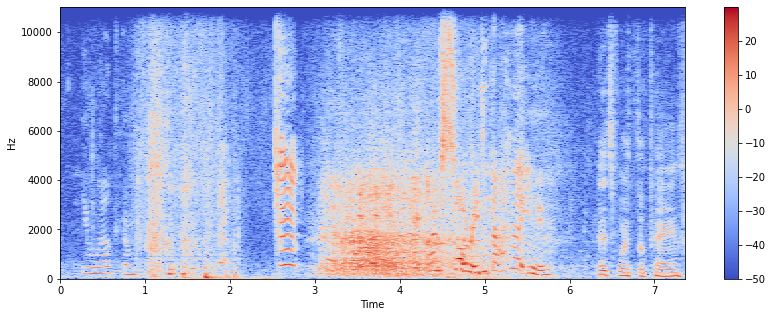

Dialogue:  30
Utterance:  7


chunk:   0%|                                                                         | 0/186 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia30_utt7.wav


MoviePy - Done.


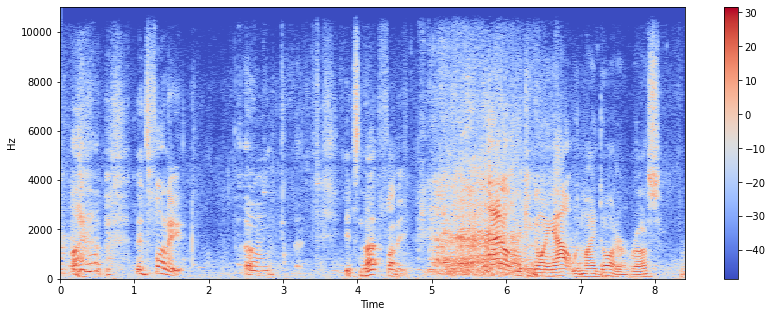

Dialogue:  30
Utterance:  11


chunk:   0%|                                                                         | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia30_utt11.wav


MoviePy - Done.


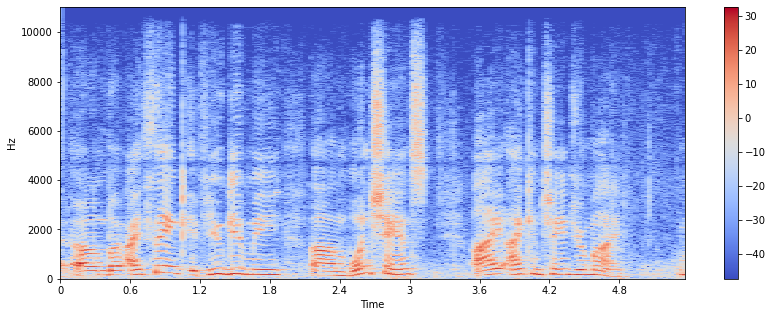

Dialogue:  32
Utterance:  17


chunk:  10%|██████▊                                                           | 3/29 [00:00<00:01, 16.80it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia32_utt17.wav


MoviePy - Done.


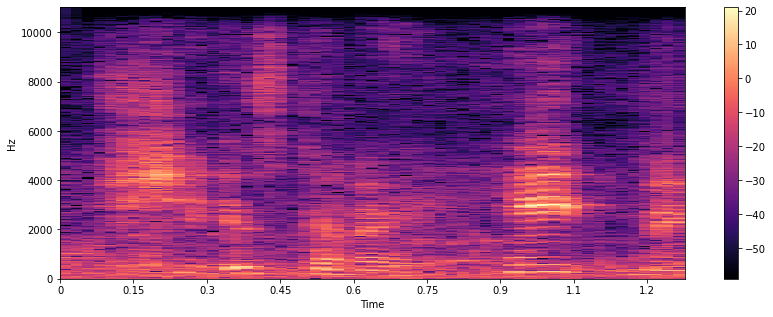

Dialogue:  33
Utterance:  0


chunk:   3%|██                                                                | 3/98 [00:00<00:04, 19.27it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia33_utt0.wav


MoviePy - Done.


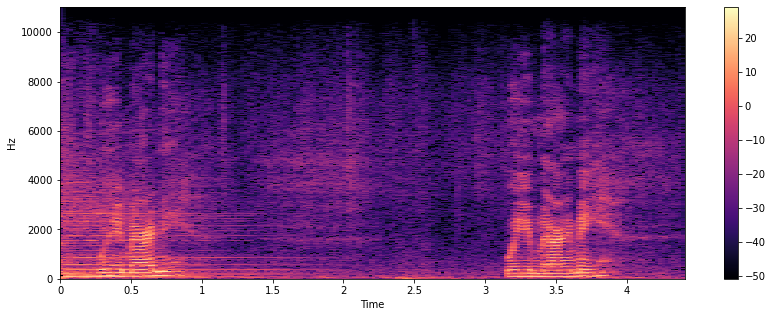

Dialogue:  40
Utterance:  9


chunk:   0%|                                                                          | 0/27 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia40_utt9.wav


MoviePy - Done.


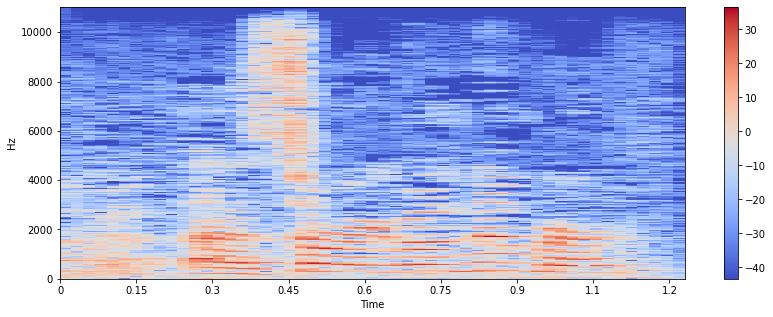

Dialogue:  46
Utterance:  11


chunk:  14%|█████████▍                                                        | 3/21 [00:00<00:00, 19.14it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia46_utt11.wav


MoviePy - Done.


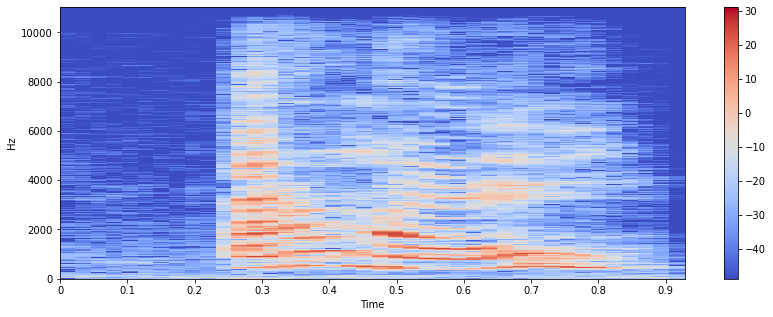

Dialogue:  49
Utterance:  4


chunk:   0%|                                                                          | 0/36 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia49_utt4.wav


MoviePy - Done.


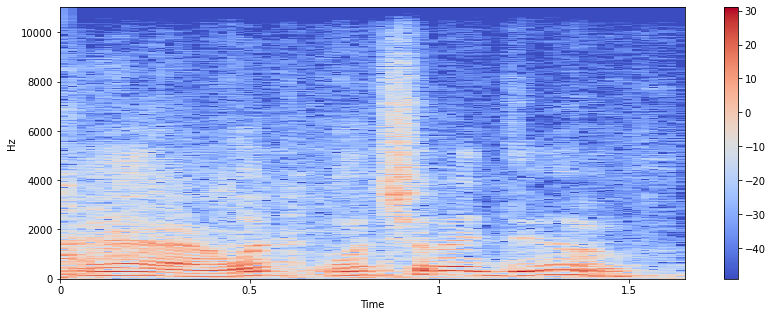

Dialogue:  50
Utterance:  5


chunk:   3%|██                                                                | 3/98 [00:00<00:05, 16.60it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia50_utt5.wav


MoviePy - Done.


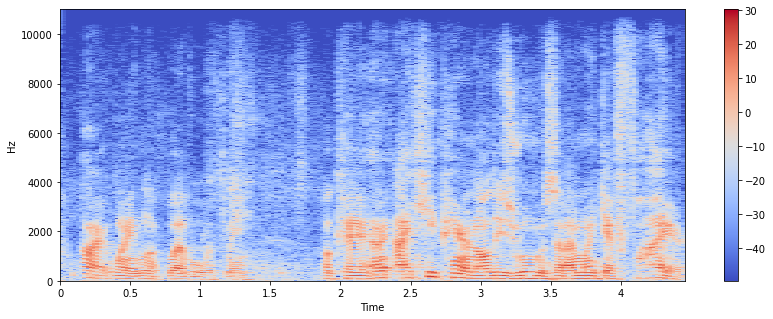

Dialogue:  50
Utterance:  6


chunk:   4%|██▊                                                               | 3/72 [00:00<00:03, 22.12it/s, now=None]

MoviePy - Writing audio in C:/Users/Gauri/Desktop/New folder/train_splits/dia50_utt6.wav


MoviePy - Done.


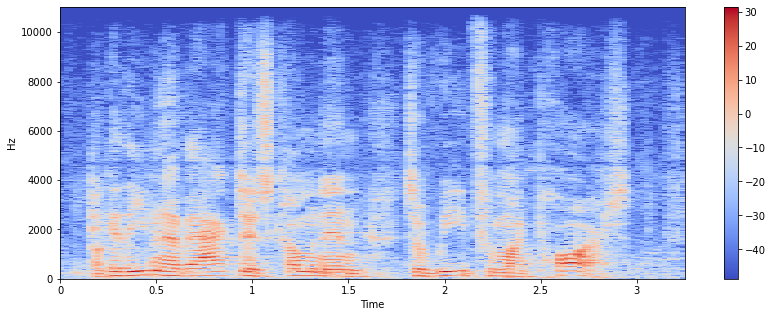

In [40]:
counter = 0
for dia, utt in zip(fear_data['Dialogue_ID'], fear_data['Utterance_ID']):
    if counter >= 20:
        break
    print('Dialogue: ', dia)
    print('Utterance: ', utt)
    my_clip = mp.VideoFileClip(f"C:/Users/Gauri/Desktop/New folder/train_splits/dia{dia}_utt{utt}.mp4".format(dia, utt))
    my_clip.audio.write_audiofile(f"C:/Users/Gauri/Desktop/New folder/train_splits/dia{dia}_utt{utt}.wav".format(dia, utt))
    y, sr = librosa.load(f"C:/Users/Gauri/Desktop/New folder/train_splits/dia{dia}_utt{utt}.wav".format(dia, utt))
    Y = librosa.stft(y)
    Ydb = librosa.amplitude_to_db(abs(Y))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()
    counter += 1